In [1]:
from datetime import datetime
HOMEPATH = "/home/ubuntu/fastai/"
DATA_HOME_DIR = HOMEPATH + "data/cifar-10/"
DATA_WORKING = DATA_HOME_DIR + "sample/"
DATA_WORKING_RESULTS = DATA_WORKING + "results/"

print ("DATA_WORKING      :", DATA_WORKING)
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)

('DATA_WORKING      :', '/home/ubuntu/fastai/data/cifar-10/sample/')
('DATA_WORKING_RESULTS:', '/home/ubuntu/fastai/data/cifar-10/sample/results/')


In [2]:
from keras import backend as K
from keras.models import load_model #move this to top when run complete.

import os

print("----------------")
def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("theano")

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


----------------


In [3]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
# Rather than importing everything manually, we'll make things easy
#   and load them all in utils.py, and just import them from there.
%matplotlib inline
import utils; reload(utils)
from utils import *
from utils import plots, get_batches, plot_confusion_matrix, get_data


('os.getcwd:', '/home/ubuntu/fastai')


In [4]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import pandas as pd
import scipy
from random import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt


('os.getcwd:', '/home/ubuntu/fastai')


In [5]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

from vgg16 import Vgg16

In [6]:
#path = HOMEPATH + "data/dogscats/sample/"
path = DATA_HOME_DIR 
#path = DATA_HOME_DIR + "sample/"
train_path = path + 'train/'
test_path = path + 'test/'
testUnknown_path = path + 'test/unknown/'
valid_path = path + 'valid/'
model_path = path + 'models/'
sample_path = path + 'sample/'
sampleTrain_path = path + 'sample/train/'
sampleTest_path = path + 'sample/test/'
sampleValid_path = path + 'sample/valid/'
sampleResults_path = path + 'sample/results/'
sampleTestUnknown_path = path + 'sample/test/unknown/'

categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


batch_size=64

In [7]:
def dirFileList(dir_path):
    return [name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]


In [8]:
dirList = [train_path, valid_path, sampleTrain_path, sampleValid_path]

for dir_path in dirList:
    for category in categories:
        print ("# of files in", dir_path+category, ":", len(dirFileList(dir_path+category)))

# of files in /home/ubuntu/fastai/data/cifar-10/train/airplane : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/automobile : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/bird : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/cat : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/deer : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/dog : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/frog : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/horse : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/ship : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/truck : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/valid/airplane : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/automobile : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/bird : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/cat : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/deer : 

In [9]:
vgg = Vgg16()
model = vgg.model
print ("type(vgg):", type(vgg))
print ("type(model):", type(model))

type(vgg): <type 'instance'>
type(model): <class 'keras.models.Sequential'>


In [10]:
def showLayersInfo(model):
    print ("Number of layers : ", len(model.layers))
    for layer in model.layers:
        print (type(layer))

In [11]:
showLayersInfo(model)

Number of layers :  38
<class 'keras.layers.core.Lambda'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolutio

In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [13]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
startTime= datetime.now()
print ("startTime:", startTime)
val_batches = get_batches(DATA_WORKING+'valid/', shuffle=False, batch_size=1)
timeElapsed=datetime.now()-startTime
print('val_batches: Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))

print ("\n")

startTime= datetime.now()
print ("startTime:", startTime)
batches     = get_batches(DATA_WORKING+'train/', shuffle=False, batch_size=1)
timeElapsed=datetime.now()-startTime
print('batches : Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-09 06:37:46.595672
Found 2000 images belonging to 10 classes.
val_batches: Time elapsed (hh:mm:ss.ms) 0:00:00.045200


startTime: 2017-12-09 06:37:46.641252
Found 8000 images belonging to 10 classes.
batches : Time elapsed (hh:mm:ss.ms) 0:00:00.169761


In [14]:
print("DATA_WORKING:", DATA_WORKING)

DATA_WORKING: /home/ubuntu/fastai/data/cifar-10/sample/


In [15]:
#Keras returns *classes* as a single column, so we convert to one hot encoding
def onehot(x): 
    return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [16]:
val_classes = val_batches.classes
trn_classes = batches.classes
print ("val_classes:", type(val_classes), val_classes.shape)
print("val_classes[0:10]:", val_classes[0:10])
print ("trn_classes:", type(trn_classes), trn_classes.shape)
print("trn_classes[0:10]:", trn_classes[0:10])
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)
print ("after onehot conversion.")
print ("val_labels:", val_labels[0])
print ("trn_labels:", trn_labels[0])

val_classes: <type 'numpy.ndarray'> (2000,)
val_classes[0:10]: [0 0 0 0 0 0 0 0 0 0]
trn_classes: <type 'numpy.ndarray'> (8000,)
trn_classes[0:10]: [0 0 0 0 0 0 0 0 0 0]
after onehot conversion.
val_labels: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
trn_labels: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [17]:
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)
print (DATA_WORKING_RESULTS+'train_data.bc')
trn_data = load_array(DATA_WORKING_RESULTS+'train_data.bc')
val_data = load_array(DATA_WORKING_RESULTS+'valid_data.bc')
print ("trn_data:", type(trn_data), trn_data.shape)#should return trn_data: <type 'numpy.ndarray'> (8000, 3, 224, 224)
print ("val_data:", type(val_data), val_data.shape)#should return val_data: <type 'numpy.ndarray'> (2000, 3, 224, 224)


DATA_WORKING_RESULTS: /home/ubuntu/fastai/data/cifar-10/sample/results/
/home/ubuntu/fastai/data/cifar-10/sample/results/train_data.bc
trn_data: <type 'numpy.ndarray'> (8000, 3, 224, 224)
val_data: <type 'numpy.ndarray'> (2000, 3, 224, 224)


In [18]:
trn_features = load_array(DATA_WORKING_RESULTS+'train_lastlayer_features.bc')
val_features = load_array(DATA_WORKING_RESULTS+'valid_lastlayer_features.bc')

In [19]:
# 1000 inputs, since that's the saved features, and 10 outputs, for # of categories
startTime= datetime.now()
print ("startTime:", startTime)


lm = Sequential([ Dense(10, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-09 06:37:53.730798
Time elapsed (hh:mm:ss.ms) 0:00:00.011796


In [20]:
batch_size=64

In [21]:
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size, 
       validation_data=(val_features, val_labels))


Train on 8000 samples, validate on 2000 samples
Epoch 1/3
8000/8000 [==============================] - 0s - loss: 1.8630 - acc: 0.3460 - val_loss: 1.7207 - val_acc: 0.3950
Epoch 2/3
8000/8000 [==============================] - 0s - loss: 1.6565 - acc: 0.4166 - val_loss: 1.6368 - val_acc: 0.4255
Epoch 3/3
8000/8000 [==============================] - 0s - loss: 1.5807 - acc: 0.4456 - val_loss: 1.5656 - val_acc: 0.4625


In [22]:
print (type(lm))
print (lm.summary())

<class 'keras.models.Sequential'>
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 10)            10010       dense_input_1[0][0]              
Total params: 10,010
Trainable params: 10,010
Non-trainable params: 0
____________________________________________________________________________________________________
None


In [23]:
preds = lm.predict_classes(val_features, batch_size=batch_size)

  64/2000 [..............................] - ETA: 0s

In [24]:
#probabilities of each category results in numpy array with column for each category.
probs = lm.predict_proba(val_features, batch_size=batch_size)


  64/2000 [..............................] - ETA: 0s

In [25]:
filenames = val_batches.filenames


In [26]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [27]:
cm = confusion_matrix(val_classes, preds)

[[ 90  13  11   2   5   3   6   5  46  19]
 [ 11 121   3   1   3   6   6  11   6  32]
 [ 19   2  63  12  32  10  31  22   6   3]
 [  3   9  17  33  18  54  32  20   5   9]
 [  7   4  16   8 102   7  19  31   1   5]
 [  2   3  14  18  25  81  17  32   4   4]
 [  3   6   9   5  32  10 116  14   3   2]
 [  3   9   7   7  17  11   7 107   5  27]
 [ 24  19  10   4   6   0   0   9 107  21]
 [  6  43   5   4   4   2   4  18   9 105]]


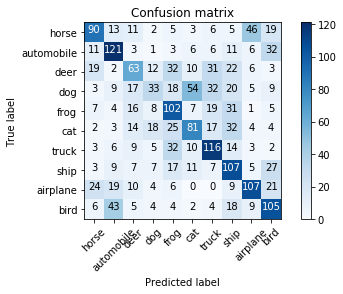

In [28]:
plot_confusion_matrix(cm, val_batches.class_indices)

In [29]:
print ("before pop, # of layers:", len(model.layers))
model.pop()
print ("after pop, # of layers:", len(model.layers))
for layer in model.layers: layer.trainable=False

before pop, # of layers: 38
after pop, # of layers: 37


In [30]:
print (type(vgg.model))


<class 'keras.models.Sequential'>


In [31]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [32]:
model.add(Dense(10, activation='softmax'))#NB: Dense requires 10 because 10 categories.

In [33]:
print ("after adding dense layer, # of layers:", len(model.layers))

after adding dense layer, # of layers: 38


In [34]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [35]:
print ("# of layers:", len(model.layers))
for layer in model.layers:
    print (type(layer))

# of layers: 38
<class 'keras.layers.core.Lambda'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<

In [36]:
layers = model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
print (type(first_dense_idx), first_dense_idx)
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]: 
    layer.trainable=True

<type 'int'> 33


In [37]:
startTime= datetime.now()
print ("startTime:", startTime)
model.load_weights(DATA_WORKING_RESULTS+'finetune2.h5')
timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-09 06:38:09.113554
Time elapsed (hh:mm:ss.ms) 0:00:00.358111


In [38]:
opt = RMSprop(lr=0.1)

In [39]:
for layer in layers[12:]: layer.trainable=True
K.set_value(opt.lr, 0.001)

In [40]:
model.load_weights(DATA_WORKING_RESULTS+'finetune3.h5')

In [41]:
preds = lm.predict_classes(val_features, batch_size=batch_size)

  64/2000 [..............................] - ETA: 0s

[[ 90  13  11   2   5   3   6   5  46  19]
 [ 11 121   3   1   3   6   6  11   6  32]
 [ 19   2  63  12  32  10  31  22   6   3]
 [  3   9  17  33  18  54  32  20   5   9]
 [  7   4  16   8 102   7  19  31   1   5]
 [  2   3  14  18  25  81  17  32   4   4]
 [  3   6   9   5  32  10 116  14   3   2]
 [  3   9   7   7  17  11   7 107   5  27]
 [ 24  19  10   4   6   0   0   9 107  21]
 [  6  43   5   4   4   2   4  18   9 105]]


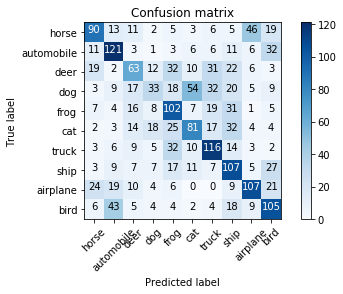

In [42]:
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)


In [43]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, 
                        samples_per_epoch=batches.n, 
                        nb_epoch=nb_epoch, 
                        validation_data=val_batches, 
                        nb_val_samples=val_batches.n)

In [44]:
fit_model(model, batches, val_batches, 4)

RuntimeError: The model needs to be compiled before being used.